In [4]:
import numpy as np

In [2]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [9]:
np.logspace(0, 2, 3)

array([  1.,  10., 100.])

In [12]:
np.logspace(0, 4, 5, base = 2)

array([ 1.,  2.,  4.,  8., 16.])

In [14]:
x = np.arange(1, 10)
y = np.arange(11, 20)
posX, posY = np.meshgrid(x, y)
print("X")
print(posX)
print("")
print("Y")
print(posY)

X
[[1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]]

Y
[[11 11 11 11 11 11 11 11 11]
 [12 12 12 12 12 12 12 12 12]
 [13 13 13 13 13 13 13 13 13]
 [14 14 14 14 14 14 14 14 14]
 [15 15 15 15 15 15 15 15 15]
 [16 16 16 16 16 16 16 16 16]
 [17 17 17 17 17 17 17 17 17]
 [18 18 18 18 18 18 18 18 18]
 [19 19 19 19 19 19 19 19 19]]


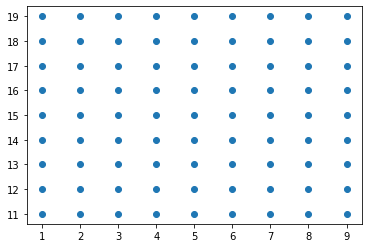

In [15]:
import matplotlib.pyplot as plt
plt.scatter(posX, posY)
plt.show()

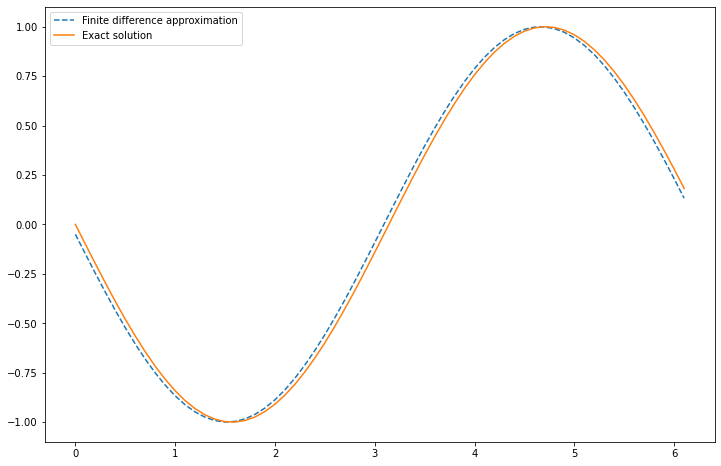

0.049984407218554114


In [18]:
# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h)
# compute function
y = np.cos(x)

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = -np.sin(x_diff)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

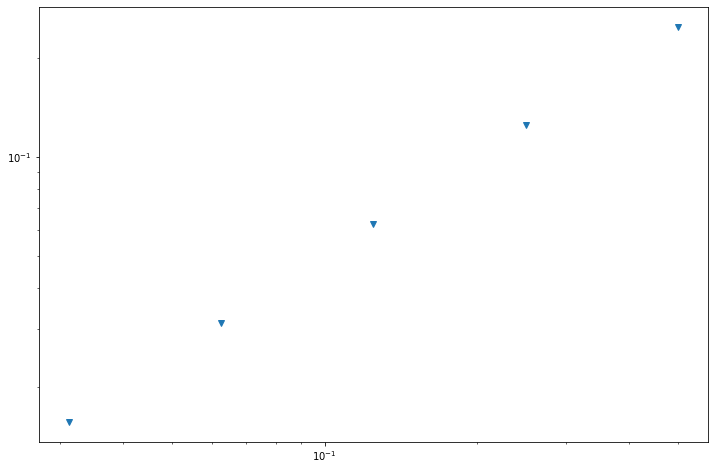

In [20]:
# define step size
h = 1
# define number of iterations to perform
iterations = 5
# list to store our step sizes
step_size = []
# list to store max error for each step size
max_error = []

for i in range(iterations):
    # halve the step size
    h /= 2
    # store this step size
    step_size.append(h)
    # compute new grid
    x = np.arange(0, 2 * np.pi, h)
    # compute function value at grid
    y = np.cos(x)
    # compute vector of forward differences
    forward_diff = np.diff(y)/h
    # compute corresponding grid
    x_diff = x[:-1]
    # compute exact solution
    exact_solution = -np.sin(x_diff)

    # Compute max error between
    # numerical derivative and exact solution
    max_error.append(\
            max(abs(exact_solution - forward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

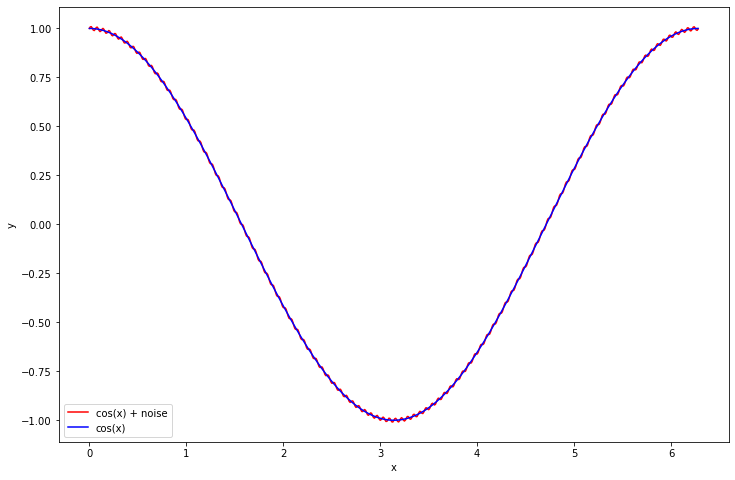

In [21]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

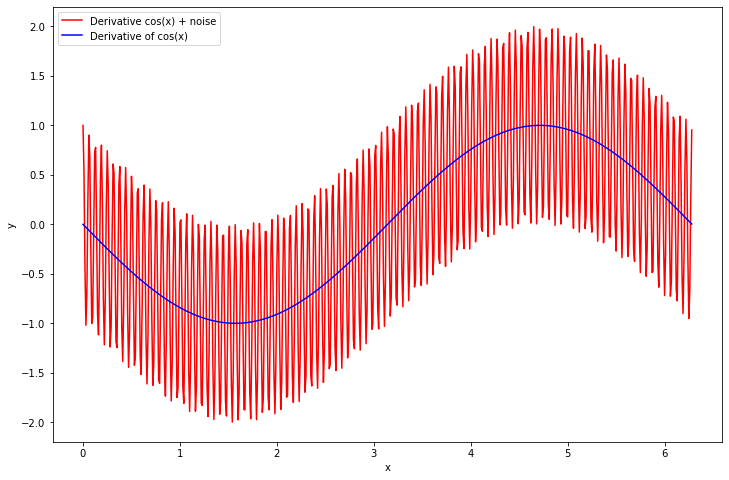

In [22]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

In [44]:
def my_num_diff_w_smoothing(x, y, n):
    y_smooth = y.copy()
    for i in range(n, len(y)-n+1):
        y_smooth[i] = np.mean(y[i - n:i + n])
    X = x[n:-n]
    Y = y_smooth[n:-n]
    return (Y[1:] - Y[:-1])/(X[1]-X[0]), X[0:-1]

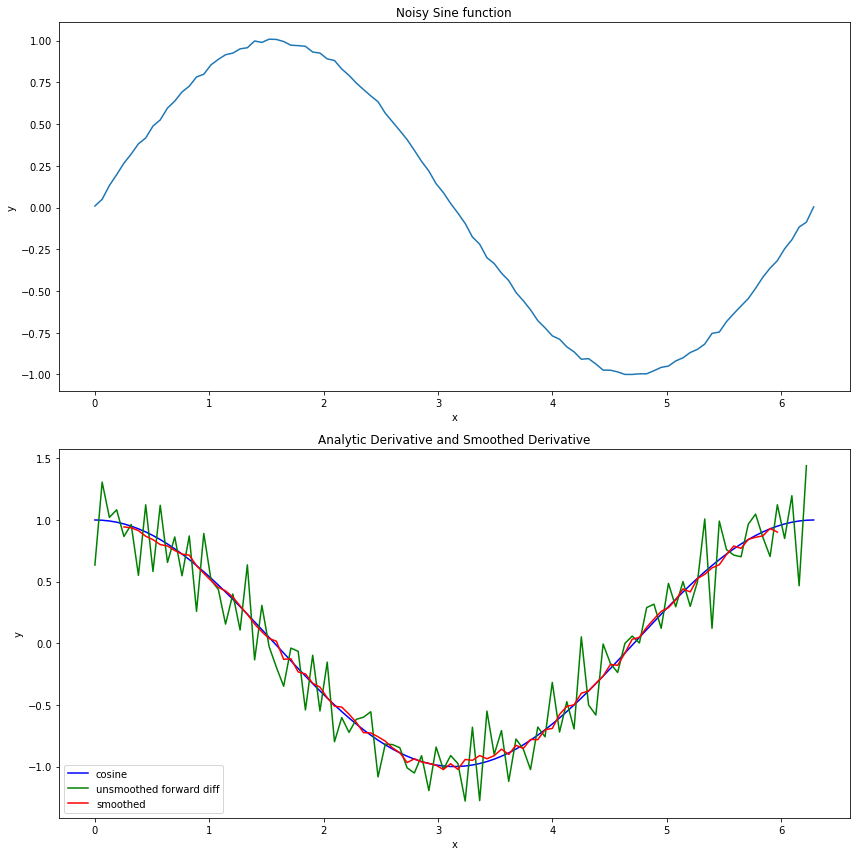

In [45]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
[dy, X] = my_num_diff_w_smoothing(x, y, 4)
plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, y)
plt.title('Noisy Sine function')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(212)
plt.plot(x, np.cos(x), 'b', label = 'cosine')
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g', \
    label = 'unsmoothed forward diff')
plt.plot(X, dy, 'r', label = 'smoothed')
plt.title('Analytic Derivative and Smoothed Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()